Extract text data Recommendation/Service reference letter

In [9]:
import PyPDF2
import pandas as pd

def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Provide the path to your PDF file
pdf_file_path = 'sample-recommendation-letter.pdf'

# Call the function to extract text from the PDF
extracted_text = extract_text_from_pdf(pdf_file_path)

# Print the extracted text
#print(extracted_text)

# Create a DataFrame with the extracted text
df = pd.DataFrame({'Text': [extracted_text]})
print(df)






                                                Text
0  Sample\t\r  letter\t\r  of\t\r  recommendation...


In [13]:
import nltk

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


True

Sentiment Analysis Visualization using a Pie Chart

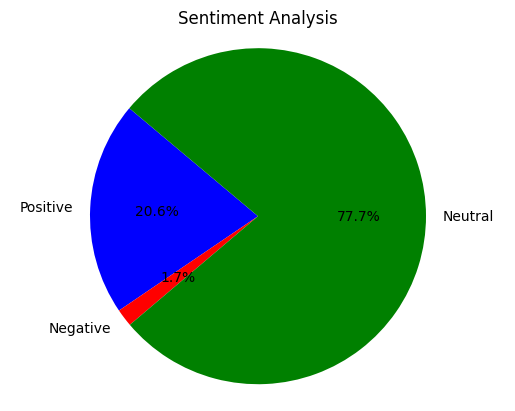

In [17]:
import PyPDF2
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Step 1: Extract text from the PDF
def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Provide the path to your PDF file
pdf_file_path = 'sample-recommendation-letter.pdf'

# Extract text from the PDF
extracted_text = extract_text_from_pdf(pdf_file_path)

# Step 2: Perform sentiment analysis
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(extracted_text)

# Step 3: Visualize the sentiment
# Prepare data for visualization
labels = ['Positive', 'Negative', 'Neutral']
sizes = [sentiment_scores['pos'], sentiment_scores['neg'], sentiment_scores['neu']]
colors = ['blue', 'red', 'green']

# Create pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

# Set title
plt.title('Sentiment Analysis')

# Display the chart
plt.show()


Senitment Analysis Visualization using a Stacked bar chart

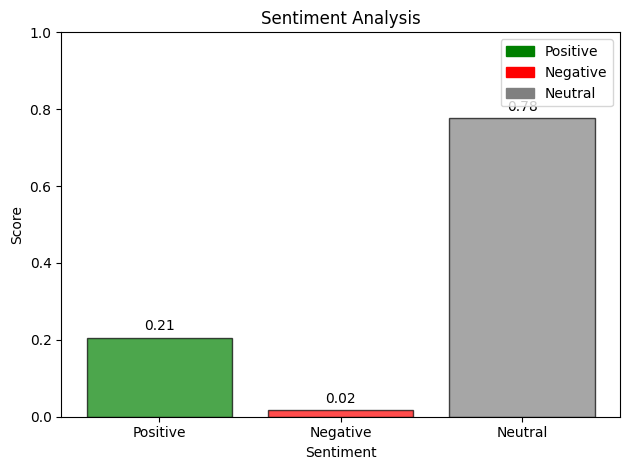

In [18]:
import PyPDF2
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract text from the PDF
def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Provide the path to your PDF file
pdf_file_path = 'sample-recommendation-letter.pdf'

# Extract text from the PDF
extracted_text = extract_text_from_pdf(pdf_file_path)

# Step 2: Perform sentiment analysis
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(extracted_text)

# Step 3: Visualize the sentiment
# Prepare data for visualization
labels = ['Positive', 'Negative', 'Neutral']
scores = [sentiment_scores['pos'], sentiment_scores['neg'], sentiment_scores['neu']]
colors = ['green', 'red', 'gray']

# Create stacked bar chart
fig, ax = plt.subplots()
bars = ax.bar(labels, scores, color=colors)

# Set bar labels
for bar, score in zip(bars, scores):
    height = bar.get_height()
    ax.annotate(f'{score:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

# Set title and axis labels
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Score')

# Customize the appearance of the bars
for bar, color in zip(bars, colors):
    bar.set_edgecolor('black')
    bar.set_alpha(0.7)
    bar.set_linewidth(1)
    bar.set_facecolor(color)

# Set the y-axis range
plt.ylim(0, 1)

# Create a legend
legend_labels = ['Positive', 'Negative', 'Neutral']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


Apply Deep learning technique RNN 

In [20]:
import PyPDF2
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Step 1: Extract text from the PDF
def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Provide the path to your PDF file
pdf_file_path = 'sample-recommendation-letter.pdf'

# Extract text from the PDF
extracted_text = extract_text_from_pdf(pdf_file_path)

# Step 2: Perform sentiment analysis
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(extracted_text)
compound_score = sentiment_scores['compound']

# Step 3: Prepare the data
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([extracted_text])
word_index = tokenizer.word_index

# Convert text to sequences
sequences = tokenizer.texts_to_sequences([extracted_text])

# Pad sequences to a fixed length
max_sequence_length = 1000  # Set your desired sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Step 4: Define and train the model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Prepare the labels
labels = np.array([1 if compound_score >= 0 else 0])

# Train the model
model.fit(padded_sequences, labels, epochs=10)

# Step 5: Perform inference/prediction
prediction = model.predict(padded_sequences)

# Map the prediction to sentiment label
sentiment_label = "Positive" if prediction >= 0.5 else "Negative"

# Print the sentiment label
print("Sentiment Label:", sentiment_label)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7023 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 162ms/step - loss: 0.6869 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 160ms/step - loss: 0.6722 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 161ms/step - loss: 0.6577 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 164ms/step - loss: 0.6426 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 165ms/step - loss: 0.6264 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 164ms/step - loss: 0.6086 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 166ms/step - loss: 0.5885 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 165ms/step - loss: 0.5656 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 300ms/step
Sentiment Label: Positive


RNN with Visualization

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7001 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 166ms/step - loss: 0.6846 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 164ms/step - loss: 0.6692 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 171ms/step - loss: 0.6532 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 170ms/step - loss: 0.6362 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 165ms/step - loss: 0.6176 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 159ms/step - loss: 0.5968 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 162ms/step - loss: 0.5729 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 167ms/step - loss: 0.5452 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 269ms/step


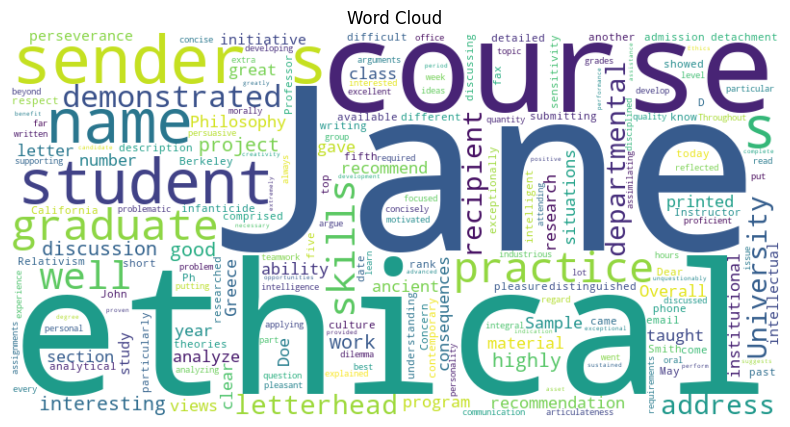

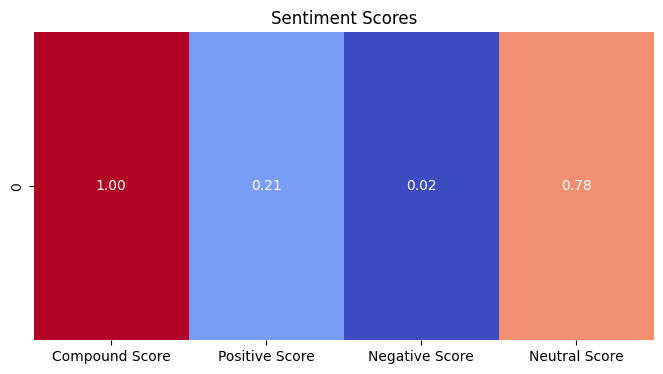

Sentiment Label: Positive


In [24]:
import PyPDF2
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd

# Step 1: Extract text from the PDF
def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Provide the path to your PDF file
pdf_file_path = 'sample-recommendation-letter.pdf'

# Extract text from the PDF
extracted_text = extract_text_from_pdf(pdf_file_path)

# Step 2: Perform sentiment analysis
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(extracted_text)
compound_score = sentiment_scores['compound']

# Step 3: Prepare the data
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([extracted_text])
word_index = tokenizer.word_index

# Convert text to sequences
sequences = tokenizer.texts_to_sequences([extracted_text])

# Pad sequences to a fixed length
max_sequence_length = 1000  # Set your desired sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Step 4: Define and train the model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Prepare the labels
labels = np.array([1 if compound_score >= 0 else 0])

# Train the model
model.fit(padded_sequences, labels, epochs=10)

# Step 5: Perform inference/prediction
prediction = model.predict(padded_sequences)

# Map the prediction to sentiment label
sentiment_label = "Positive" if prediction >= 0.5 else "Negative"

# Visualize the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(extracted_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Visualize the sentiment score heatmap
sentiment_data = {
    'Compound Score': [sentiment_scores['compound']],
    'Positive Score': [sentiment_scores['pos']],
    'Negative Score': [sentiment_scores['neg']],
    'Neutral Score': [sentiment_scores['neu']]
}
sentiment_df = pd.DataFrame(sentiment_data)
plt.figure(figsize=(8, 4))
sns.heatmap(sentiment_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Sentiment Scores')
plt.show()

# Print the sentiment label
print("Sentiment Label:", sentiment_label)
